In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [31]:
PERSON = 7
data = pd.read_csv('../data/train.csv', sep=',')

In [32]:

mean = data.loc[data['id'] == PERSON, 'x'].mean()

In [33]:
data = data[data.id == PERSON]
data = data[data['x'] < 1.5 * mean]
data = data[data['x'] > 0.5 * mean]

In [34]:
from main_features.rr_features import StatFeatures
from math import ceil


INTERVALS = 20

person_data = data.copy()

min_tresh = person_data.time.min()
max_tresh = person_data.time.max()

dur_interval = ceil((max_tresh - min_tresh) / INTERVALS)

amo_stats = list()
anomalies = list()
for interval in range(INTERVALS):
    bot_tresh = interval * dur_interval
    top_tresh = (interval + 1) * dur_interval
    interval_data = person_data.loc[(person_data.time > bot_tresh) & (person_data.time < top_tresh), 'x']
    if len(interval_data) == 0:
        continue
    stat_info = StatFeatures(interval_data, 5)
    amo_stats.append(stat_info.get_tension_index())
    if 1 in person_data.loc[(person_data.time > bot_tresh) & (person_data.time < top_tresh), 'y'].values:
        anomalies.append(1)
    else:
        anomalies.append(0)

amo_stats

Main: 764.2666666666668
Next: 757.0
Main: 748.4571428571429
Main: 737.6
Main: 776.48
Next: 757.0
Main: 766.0
Next: 769.0
Main: 784.8
Main: 778.4
Main: 771.6
Next: 749.0
Main: 767.5999999999999
Main: 773.6
Main: 760.3199999999999


[817.7773900907187,
 393.15594137258597,
 309.2782047584307,
 188.29838515304888,
 1609.828971770039,
 458.6819316013503,
 639.9426611375619,
 0,
 338.64325964456,
 884.8680484766111,
 0,
 892.143428114651,
 0,
 0,
 1800.0115200737282,
 397.3552037637484,
 1395.816273356659,
 0,
 179.53579225554404,
 913.3581182192293]

In [35]:
new_data = pd.DataFrame(columns=['AM0', 'anomaly', 'color'])
new_data['anomaly'] = anomalies
new_data['AM0'] = amo_stats

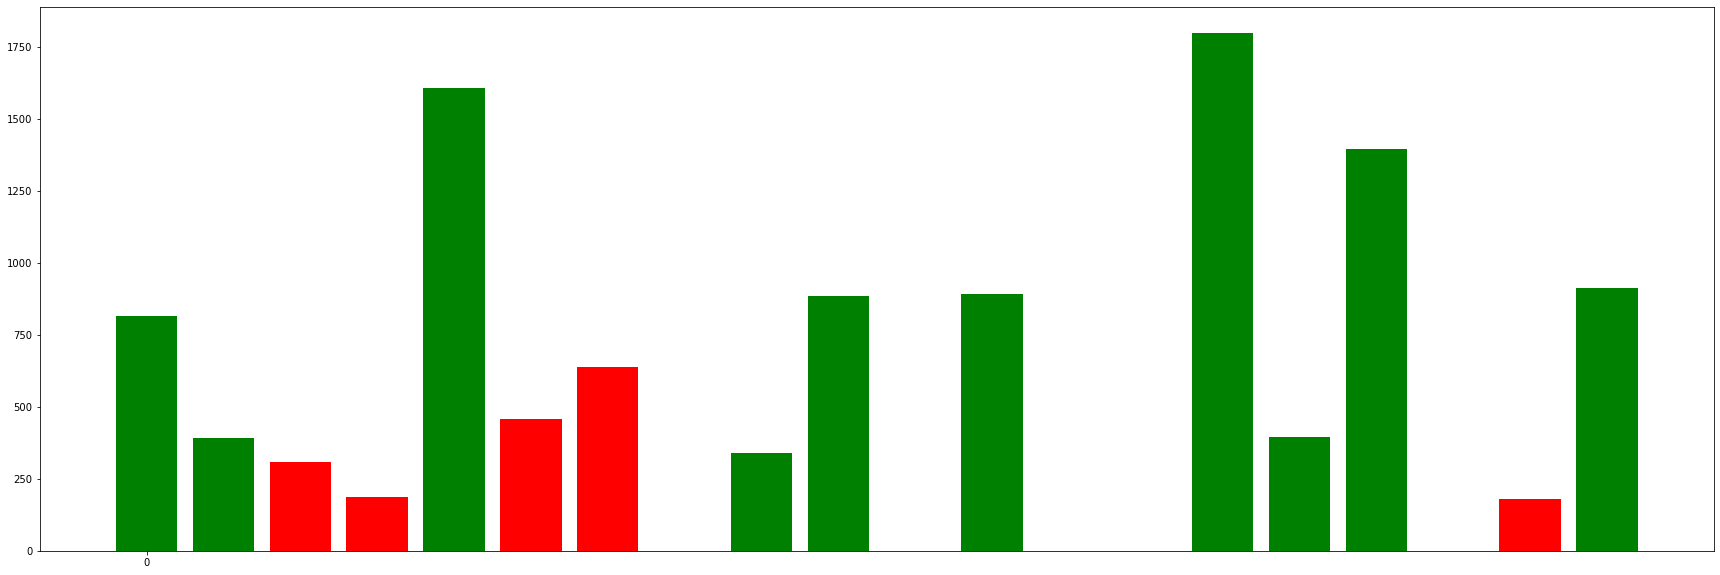

In [36]:
new_data['color'] = 'g'
new_data.loc[new_data['anomaly'] == 1, 'color'] = 'r'

plt.figure(figsize=(30, 10))

plt.bar(new_data.index, new_data['AM0'].values, color=new_data['color'].values)
plt.xticks([x for x in range(0,new_data.shape[0], 50 )] )
plt.savefig('testfig.png')